# Discord Malicious Messages Detection Bot

---



Machine learning model for Discord Malicious Messages Detection Bot with Decision Tree algorithm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


Import dataset for training. Dataset consist of 6000 malicious links on Discord and 4000 clean links.

Malicious links are provided by [nikolaischunk](https://github.com/nikolaischunk/discord-phishing-links). 



Option 1: Uploading the dataset file "discord-bot-dataset.csv" file from local drive to colab.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


If you run it in local, just ignore tab above and run this with name of file (if you put it in different directory just put path to csv file)

In [3]:
data = pd.read_csv('train.csv')
data.head()

,Domains,Malicious
0,101nitro.com,1
1,10minutemail.com,0
2,16personalities.com,0
3,1happybirthday.com,0
4,1month-premium.com,1


Option 2: Uploading the dataset file "discord-bot-dataset.csv" file from github 

*   List item
*   List item

to colab.

In [ ]:
# url = 'github file link'

# data = pd.read_csv(url)
# data.head()

We just take a look at few of our data on dataset. We have 2 columns, domain which is a lists of domains and Malicious which consist of 1 (Malicious) and 0 (Not malicious)

To look at all the data:

In [ ]:
print (data)

                       Domains  Malicious
0                 101nitro.com          1
1             10minutemail.com          0
2          16personalities.com          0
3           1happybirthday.com          0
4           1month-premium.com          1
...                        ...        ...
9995  zombieon02.netmarble.net          0
9996                   zoom.it          0
9997                   zoom.us          0
9998           zora.medium.com          0
9999                 zynga.com          0

[10000 rows x 2 columns]


Use label encoder to label the domains

In [4]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()

Define X and Y

In [5]:
x = data['Domains'].values
y = data['Malicious'].values
x_new = [['']]

print(x)
print(y)
print(x_new)

['101nitro.com' '10minutemail.com' '16personalities.com' ... 'zoom.us'
 'zora.medium.com' 'zynga.com']
[1 0 0 ... 0 0 0]
[['']]


Split the data to training data and testing data with sklearn.

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=22)

print(x_train)
print(x_test)
print(y_train)
print(y_test)

['dlscordgg.icu' 'miku.sega.jp' 'steamccommunity.com' ... 'ikea.com'
 'steamcommunittyy.com.ru' 'ndtv.com']
['discord-gifted.com' 'steamcomnumitly.com' 'php.net' ...
 'sleamcomnnunity.me' 'dlsocrd.online' 'dlscord-boost.com']
[1 0 1 ... 0 1 0]
[1 1 0 ... 1 1 1]


In [7]:
x_train = labelEncoder.fit_transform(x_train)
x_test = labelEncoder.fit_transform(x_test)
x_new = labelEncoder.fit_transform(x_new)

print(x_train)
print(x_test)
print(x_new)

[3043 4867 6505 ... 4359 6817 4984]
[ 425 1844 1380 ... 1538  807  729]
[0]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

print(x_train)
print(x_test)

[[3043]
 [4867]
 [6505]
 ...
 [4359]
 [6817]
 [4984]]
[[ 425]
 [1844]
 [1380]
 ...
 [1538]
 [ 807]
 [ 729]]


In [9]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(y_pred)

[1 1 1 ... 1 1 1]


# **Scoring of the trained model:**

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [11]:
print("Accuracy:", model.score(x_test, y_test))

print("Precision:", precision_score(y_test, y_pred))

print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.5985
Precision: 0.5985
Recall: 1.0


**The tree diagram**

[Text(0.5, 0.875, 'X[0] <= 7433.5\ngini = 0.48\nsamples = 8000\nvalue = [3197, 4803]'),
 Text(0.25, 0.625, 'X[0] <= 6139.5\ngini = 0.461\nsamples = 7445\nvalue = [2683, 4762]'),
 Text(0.125, 0.375, 'X[0] <= 4057.5\ngini = 0.491\nsamples = 6151\nvalue = [2652, 3499]'),
 Text(0.0625, 0.125, 'gini = 0.419\nsamples = 4061\nvalue = [1213, 2848]'),
 Text(0.1875, 0.125, 'gini = 0.429\nsamples = 2090\nvalue = [1439, 651]'),
 Text(0.375, 0.375, 'X[0] <= 6349.5\ngini = 0.047\nsamples = 1294\nvalue = [31, 1263]'),
 Text(0.3125, 0.125, 'gini = 0.238\nsamples = 210\nvalue = [29, 181]'),
 Text(0.4375, 0.125, 'gini = 0.004\nsamples = 1084\nvalue = [2, 1082]'),
 Text(0.75, 0.625, 'X[0] <= 7709.5\ngini = 0.137\nsamples = 555\nvalue = [514, 41]'),
 Text(0.625, 0.375, 'X[0] <= 7634.5\ngini = 0.035\nsamples = 277\nvalue = [272, 5]'),
 Text(0.5625, 0.125, 'gini = 0.01\nsamples = 201\nvalue = [200, 1]'),
 Text(0.6875, 0.125, 'gini = 0.1\nsamples = 76\nvalue = [72, 4]'),
 Text(0.875, 0.375, 'X[0] <= 7774.5\n

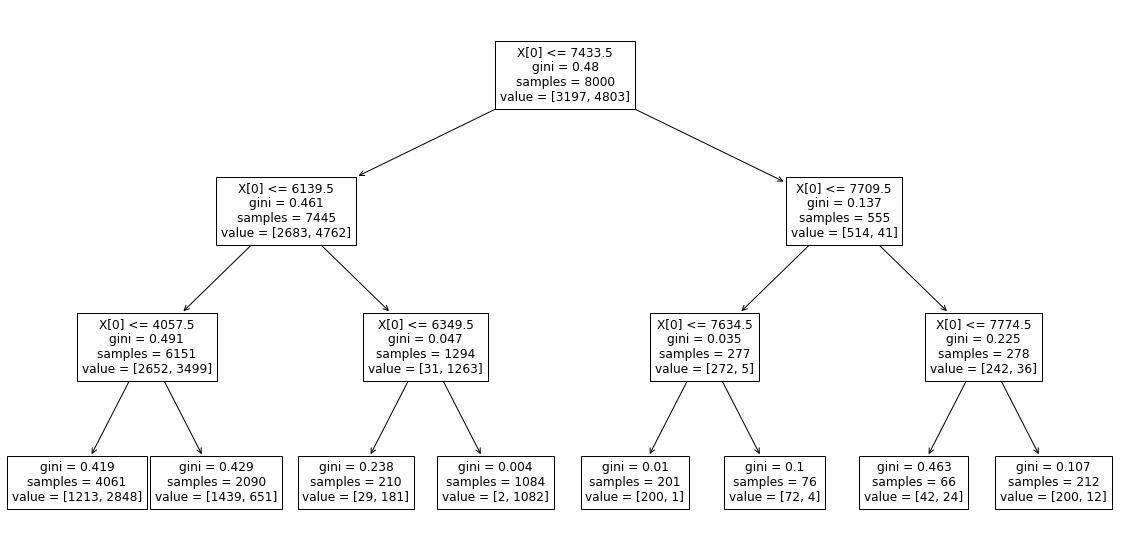

In [12]:
plt.figure(figsize=(20,10))
from sklearn import tree
tree.plot_tree(model.fit(x_train, y_train))

**Confusion Matrix**

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrx:\n\n', cm)

Confusion Matrx:

 [[   0  803]
 [   0 1197]]


**Classification Report**

In [14]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       803
           1       0.60      1.00      0.75      1197

    accuracy                           0.60      2000
   macro avg       0.30      0.50      0.37      2000
weighted avg       0.36      0.60      0.45      2000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**To import machine learning model to file using joblib**

In [15]:
from joblib import Parallel, delayed
import joblib
joblib.dump(model, 'ml_model.pkl')


['ml_model.pkl']

[link text](https://)**To call the machine learning model from bot**



```
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()

# reshape data string to float something
parsed_message = labelEncoder.fit_transform(parsed_message)
parsed_message = np.reshape(x_new, (1, -1))

from joblib import Parallel, delayed
import joblib

# Load the model from the file
ml_model = joblib.load('ml_model.pkl')
 
# Use the loaded model to make predictions
ml_model.predict(parsed_message)
```



Discord Malicious Links training with decision tree.

Kelompok skripsi:
*   2201731705 - FITRIA AZZAHRA
*   2201816316 - ANGELICA CHRISTABELLE RAMA TRIANA
*   2201817382 - NOVIGITA

Dosen Pembimbing: Nadia, S.Kom., M.TI